In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [124]:
# Function to make bar graph from the data

def make_bar(data, ax, test_name):
    models = list(data.keys())  # List of every model tested
    models.sort()

    # Get a list of every test that was tested
    all_tests = set()
    for model in models:
        all_tests |= set(data[model].keys())

    all_tests = list(all_tests)
    all_tests.sort()

    tests = []
    ticks = []
    for test in all_tests:
        if test_name in test:
            tests.append(test)
            ticks.append(test[9+len(test_name)+1::])

    x = np.arange(len(tests))  # positions of labels

    # Make bar plots
    n = len(models)  # number of models tested
    width = 0.75 / n  # width of the bars
    for i in range(n):
        model = models[i]
        # Get the accuracy for each test
        accuracy = []
        sum_accuracy = 0  # Values used to calculate average accuracy
        count = 0
        for test in tests:
            if test in data[model].keys():  
                # This model was tested with this test
                accuracy.append(data[model][test])
                sum_accuracy += data[model][test]
                count += 1
            else:
                # This model didn't get tested with this test,
                # don't count it towards the average
                accuracy.append(0)

        # Calculate the average accuracy
        if count != 0:
            avg_accuracy = sum_accuracy / count
            label = '{:s} - average accuracy: {:.2f}'.format( model, avg_accuracy)
        else:
            label = '{:s} - average accuracy: n/a'.format(model)


        rects = ax.bar(x + i*width, accuracy, width, label=label)

    yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax.set_ylabel('Accuracy', fontsize=36)
    ax.set_xlabel('Test', fontsize=36)
    ax.set_xticks(x + (n-1)*width/2)
    ax.set_xticklabels(ticks, rotation='vertical', fontsize=36)
    ax.set_yticklabels(yticks, rotation='horizontal', fontsize=36)
    ax.legend(fontsize=36)
    ax.grid(True)
    ax.set_ylim(0,1)

    return ax


    

In [38]:
# Function that loads data from the output json file and then calls make_bar

def load_data(directory):
    data = {}  # Initialize empty dictionary
    
    # Go through each file in the directory
    for filename in os.listdir(directory):
        # Make sure its a txt or json file
        if not filename.endswith('.txt') or filename.endswith('.json'):
            continue


        # Open the results json file
        f = open(directory + '/' + filename)
        f = json.load(f)

        # Store the information from the file in a dictionary
        for i in range(len(f)):
            accuracy = f[i]['Total Correct'] / f[i]['Total Attempted']

            model = f[i]['Model']
            # Remove the .txt from end of model name
            if model.endswith('.txt'):  
                model = model[:-4]

            # Remove the .txt from end of test name
            test = f[i]['Test']
            if test.endswith('.txt'):  
                test = test[:-4]
                
            # Create a new key if its not in the dictionary
            if model not in data.keys():  
                data[model] = {}
            
            # Add the accuracy for this test and model
            data[model].update({test: accuracy})  
    
    return data


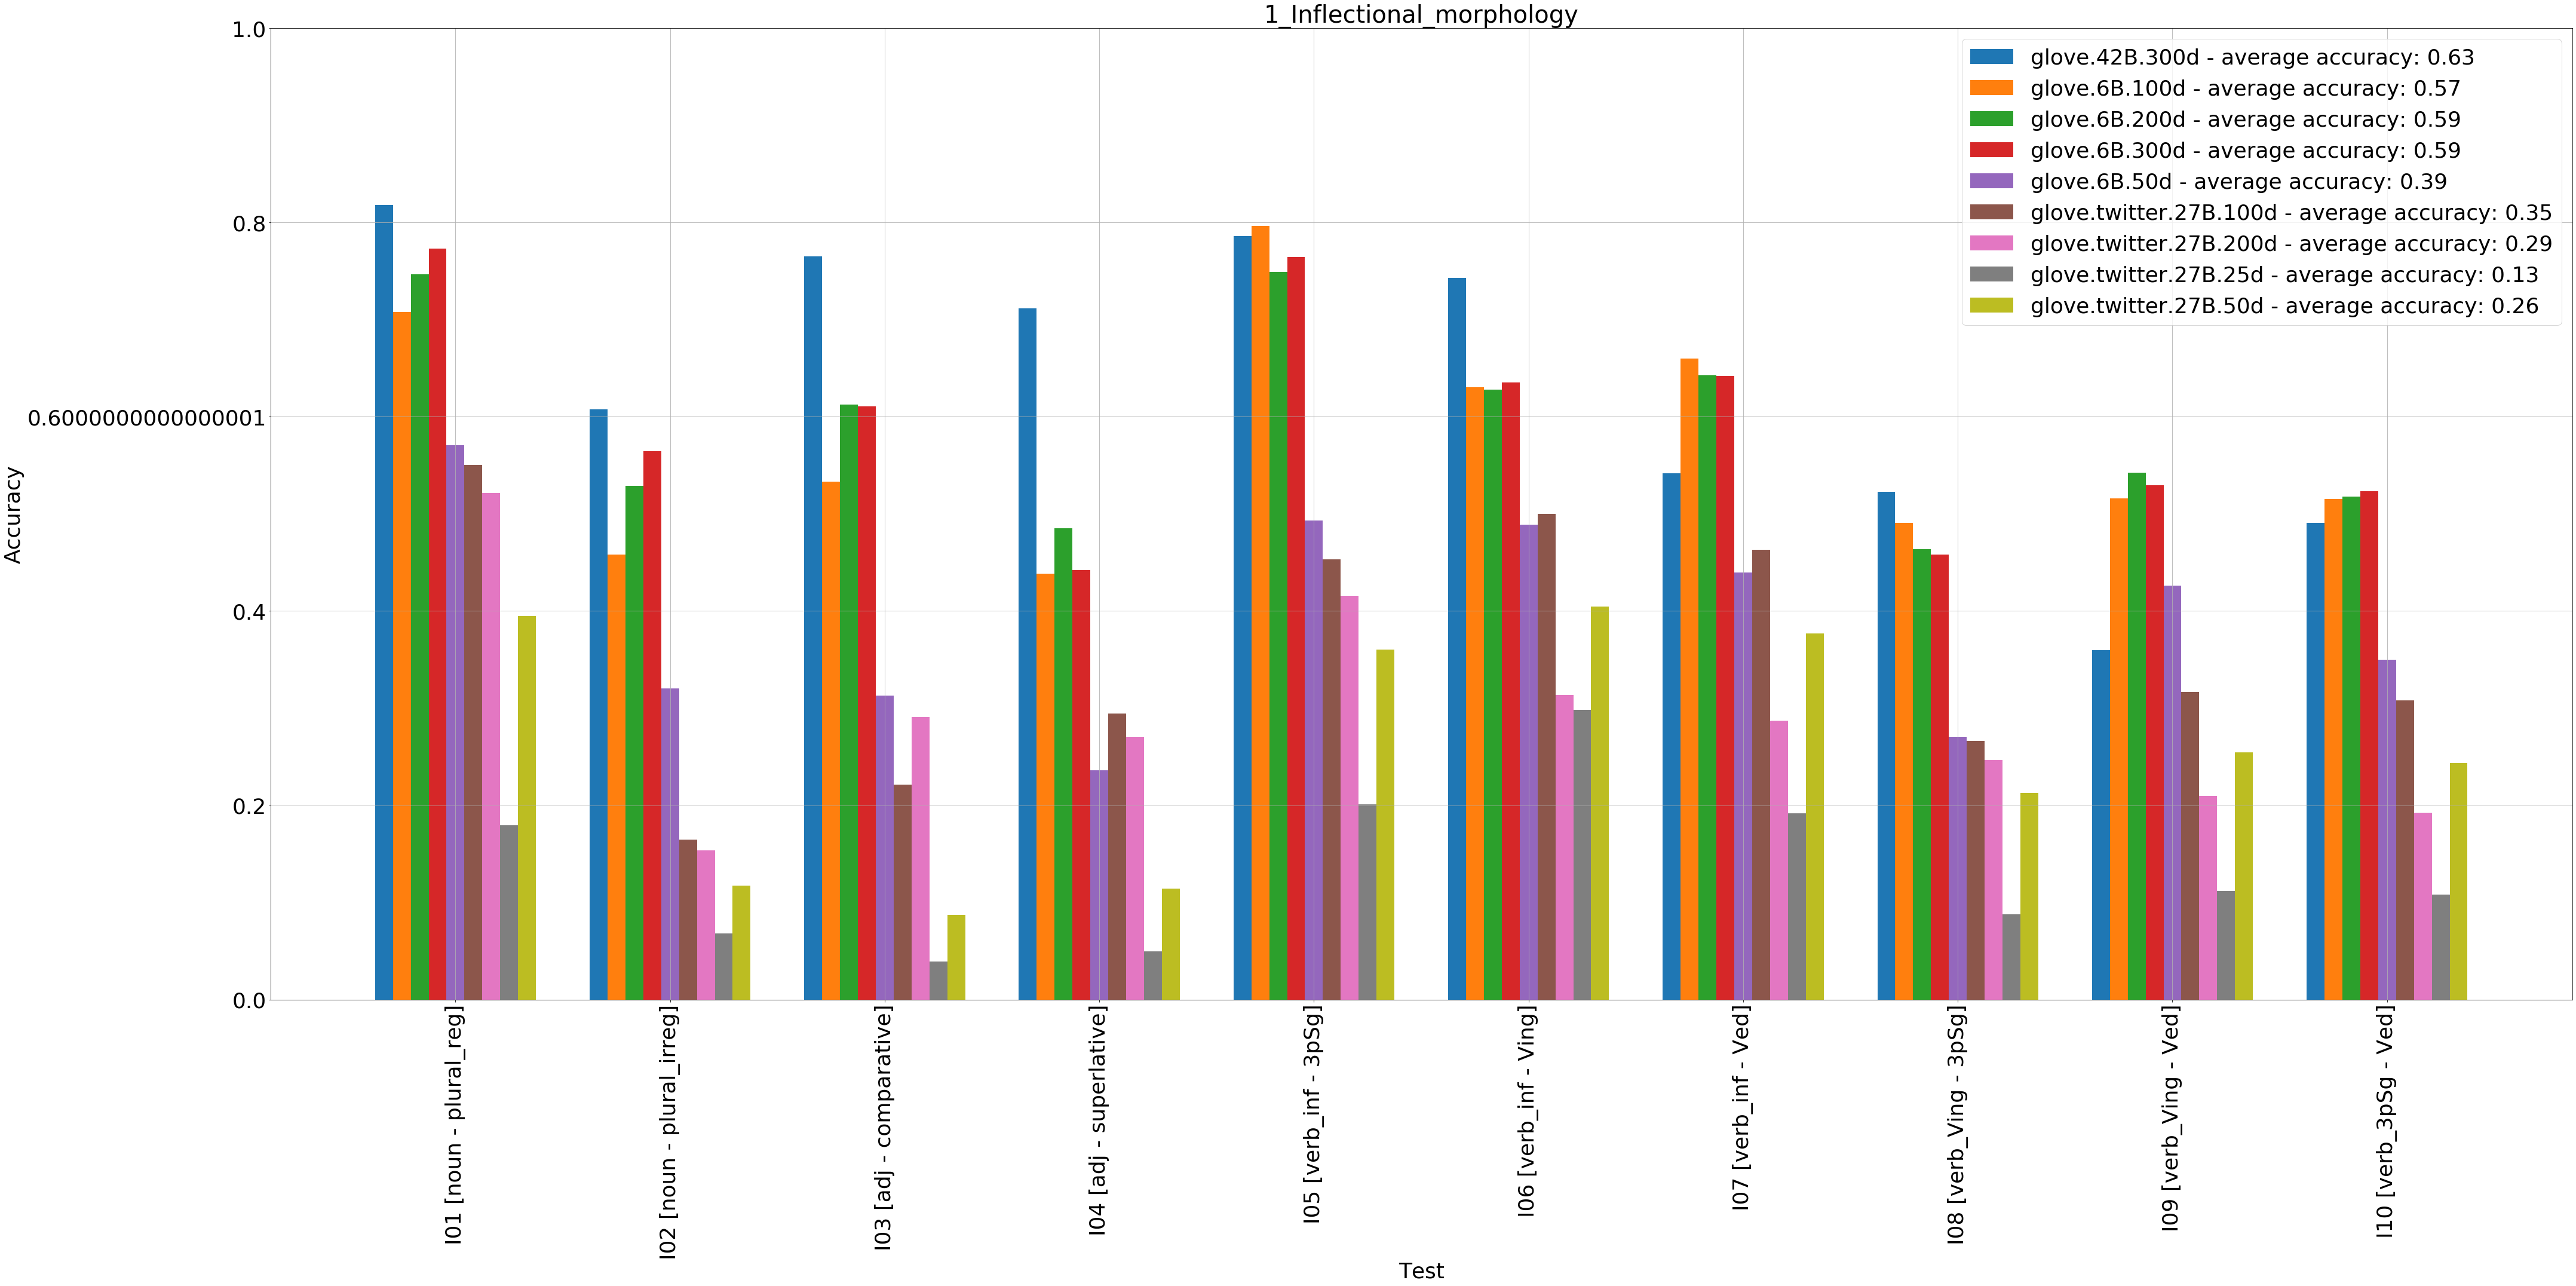

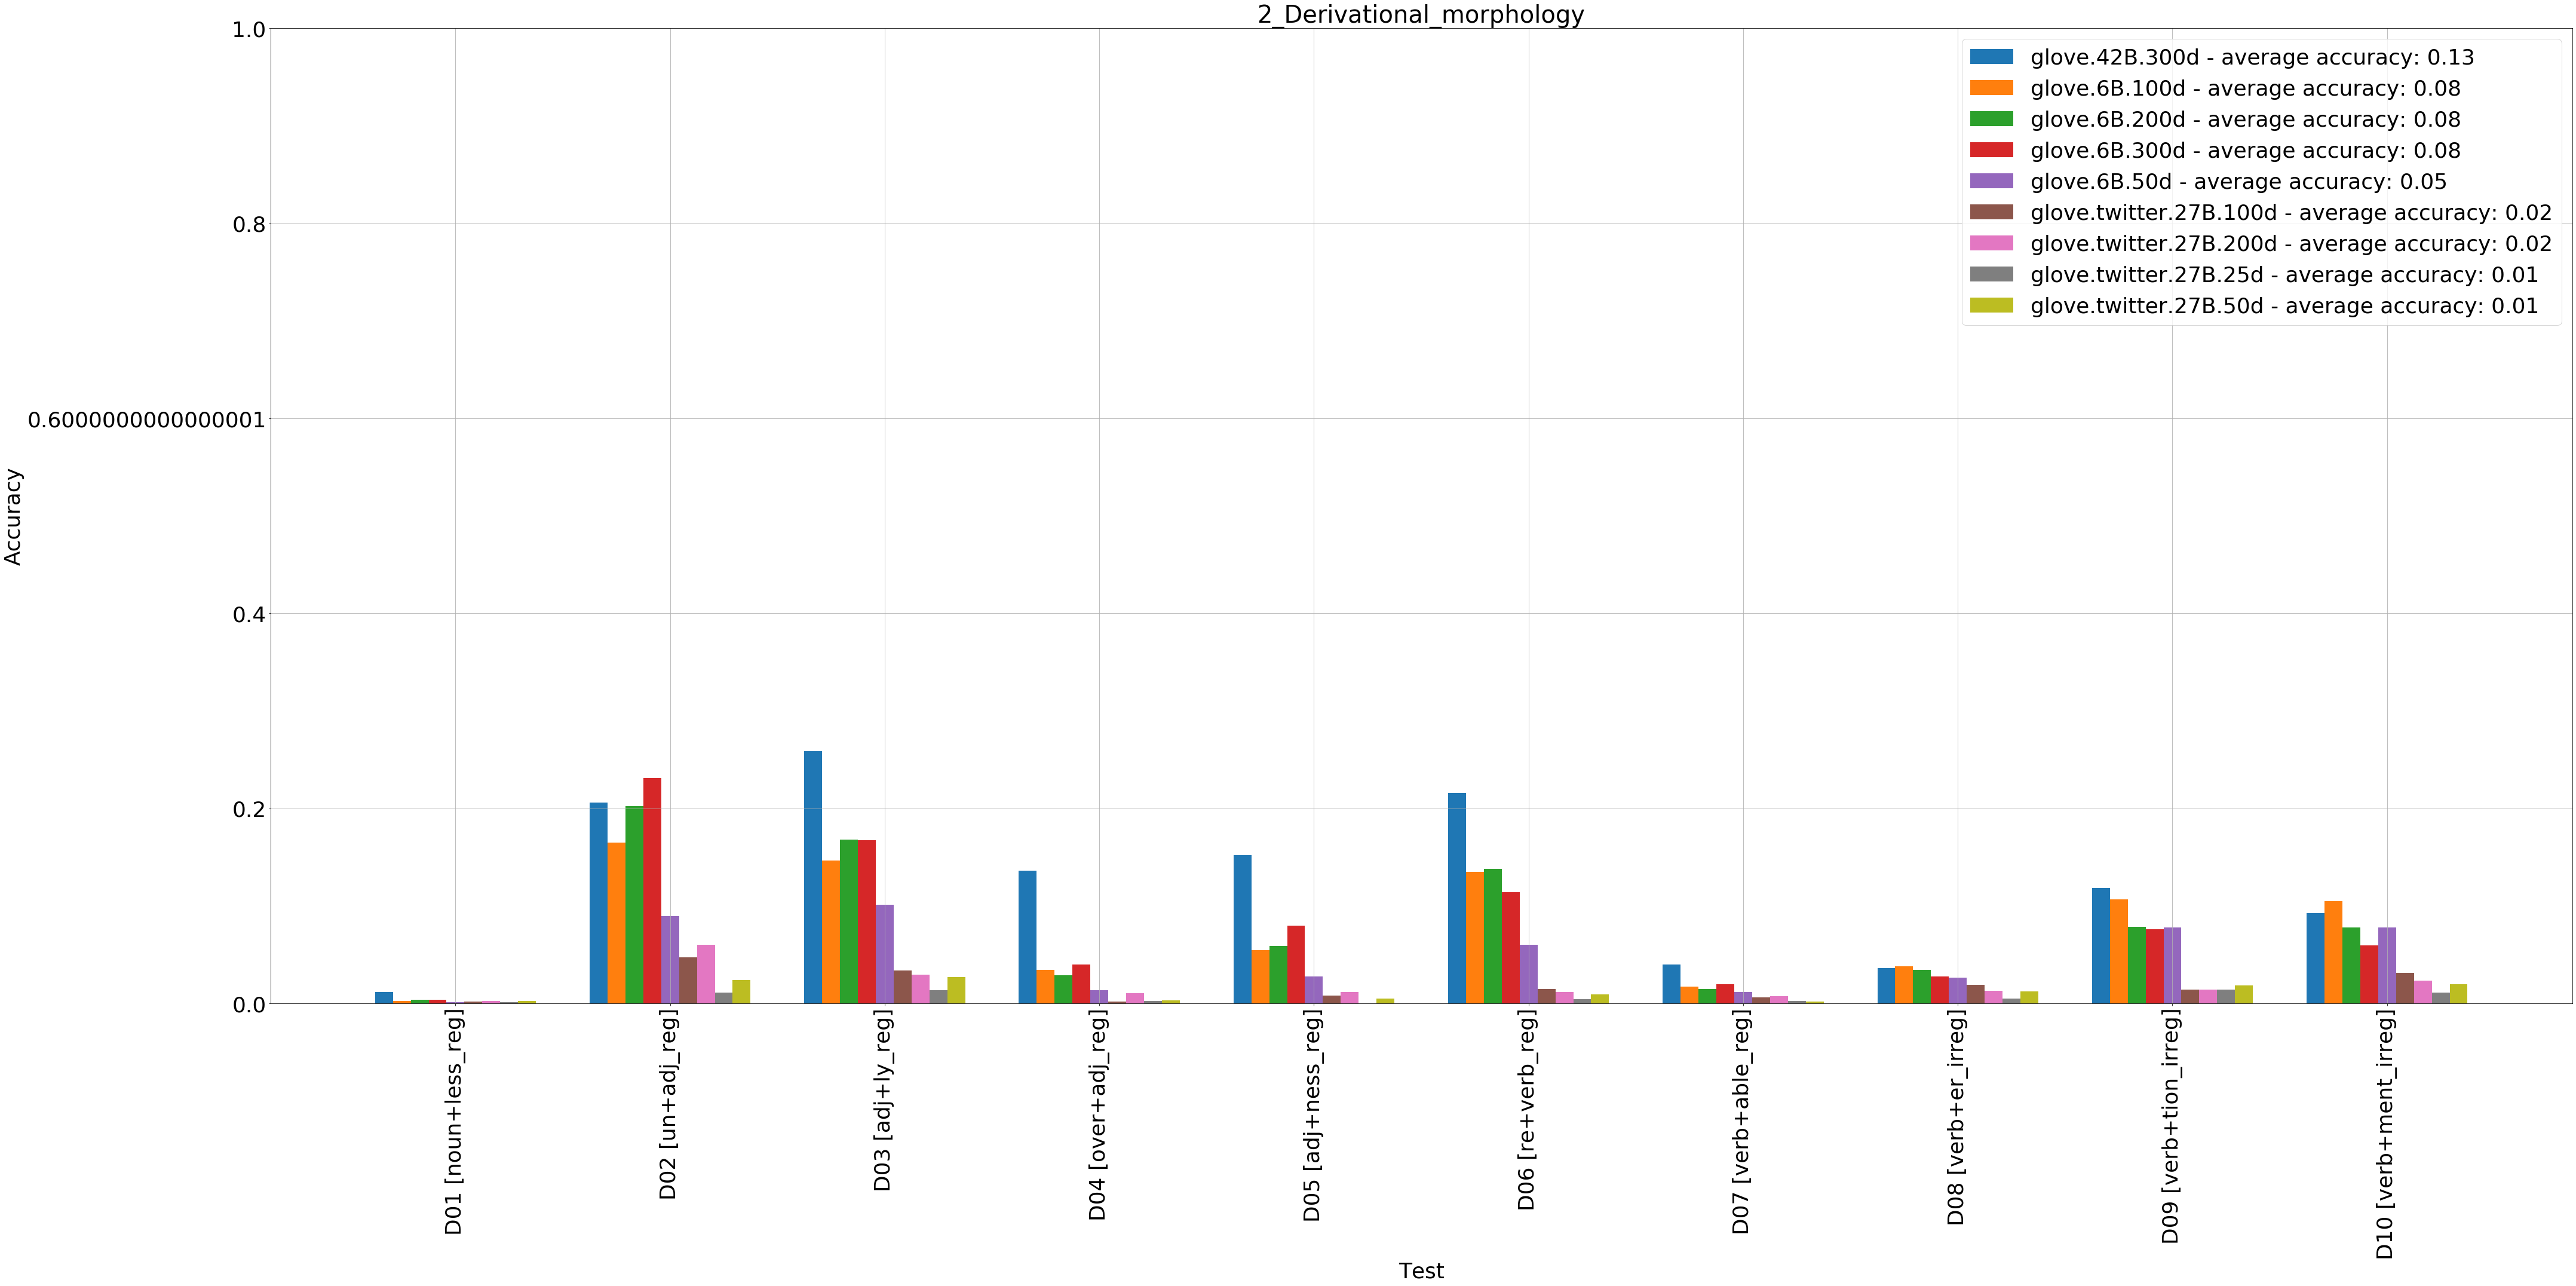

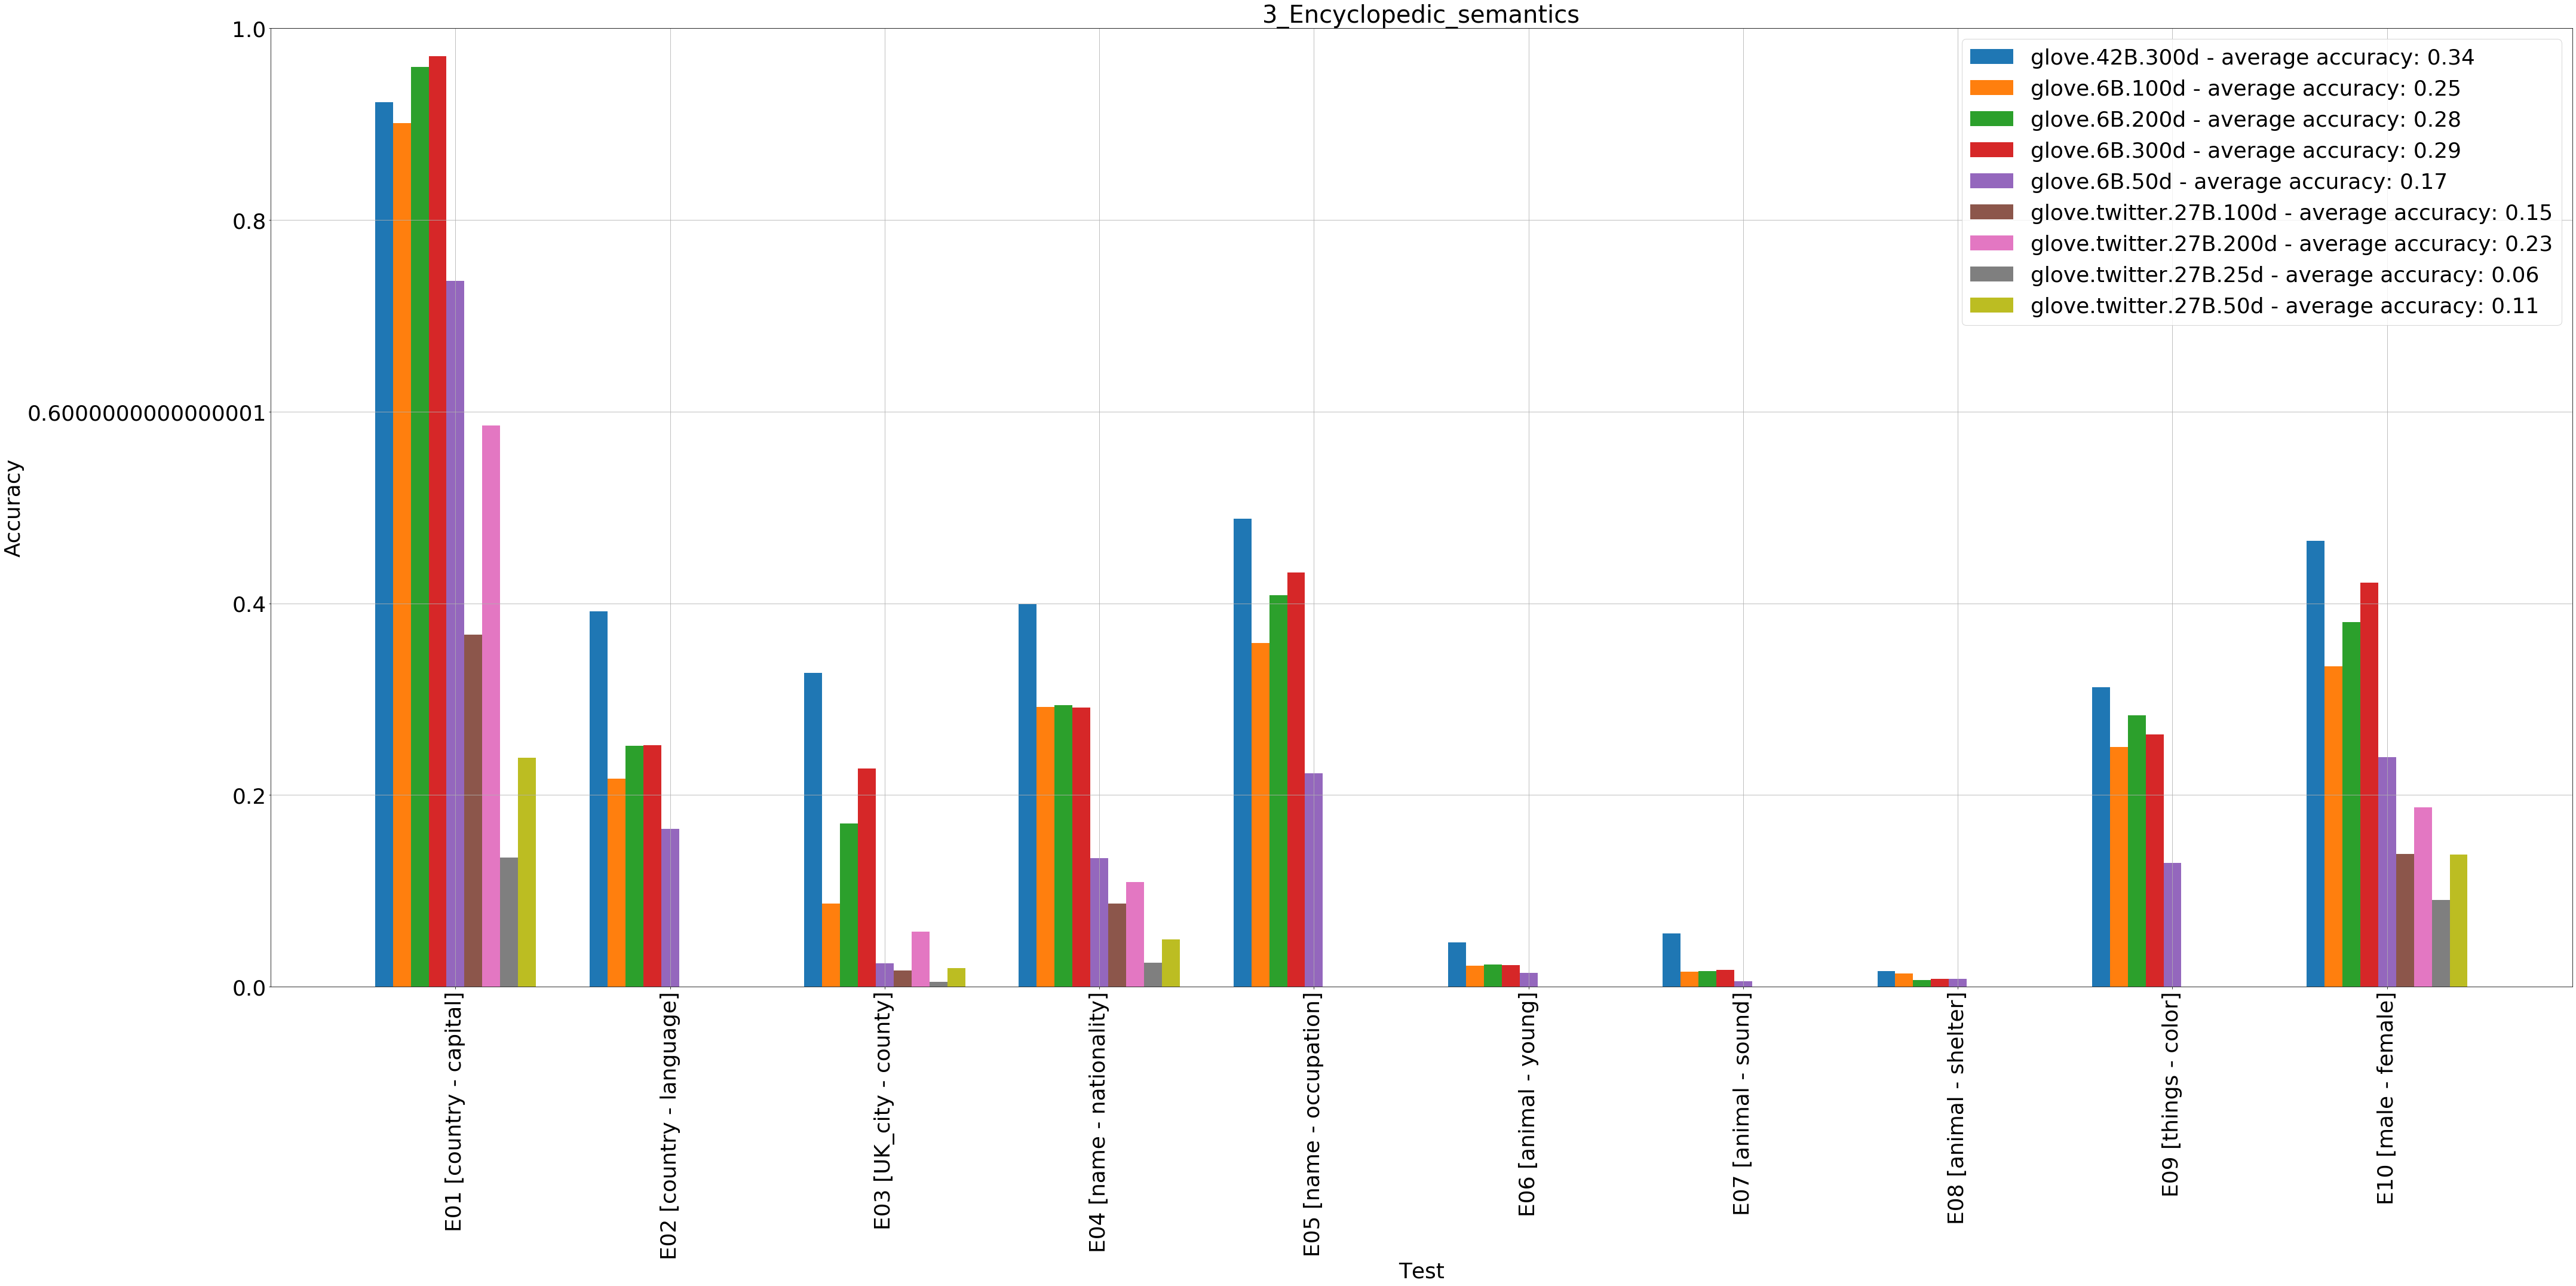

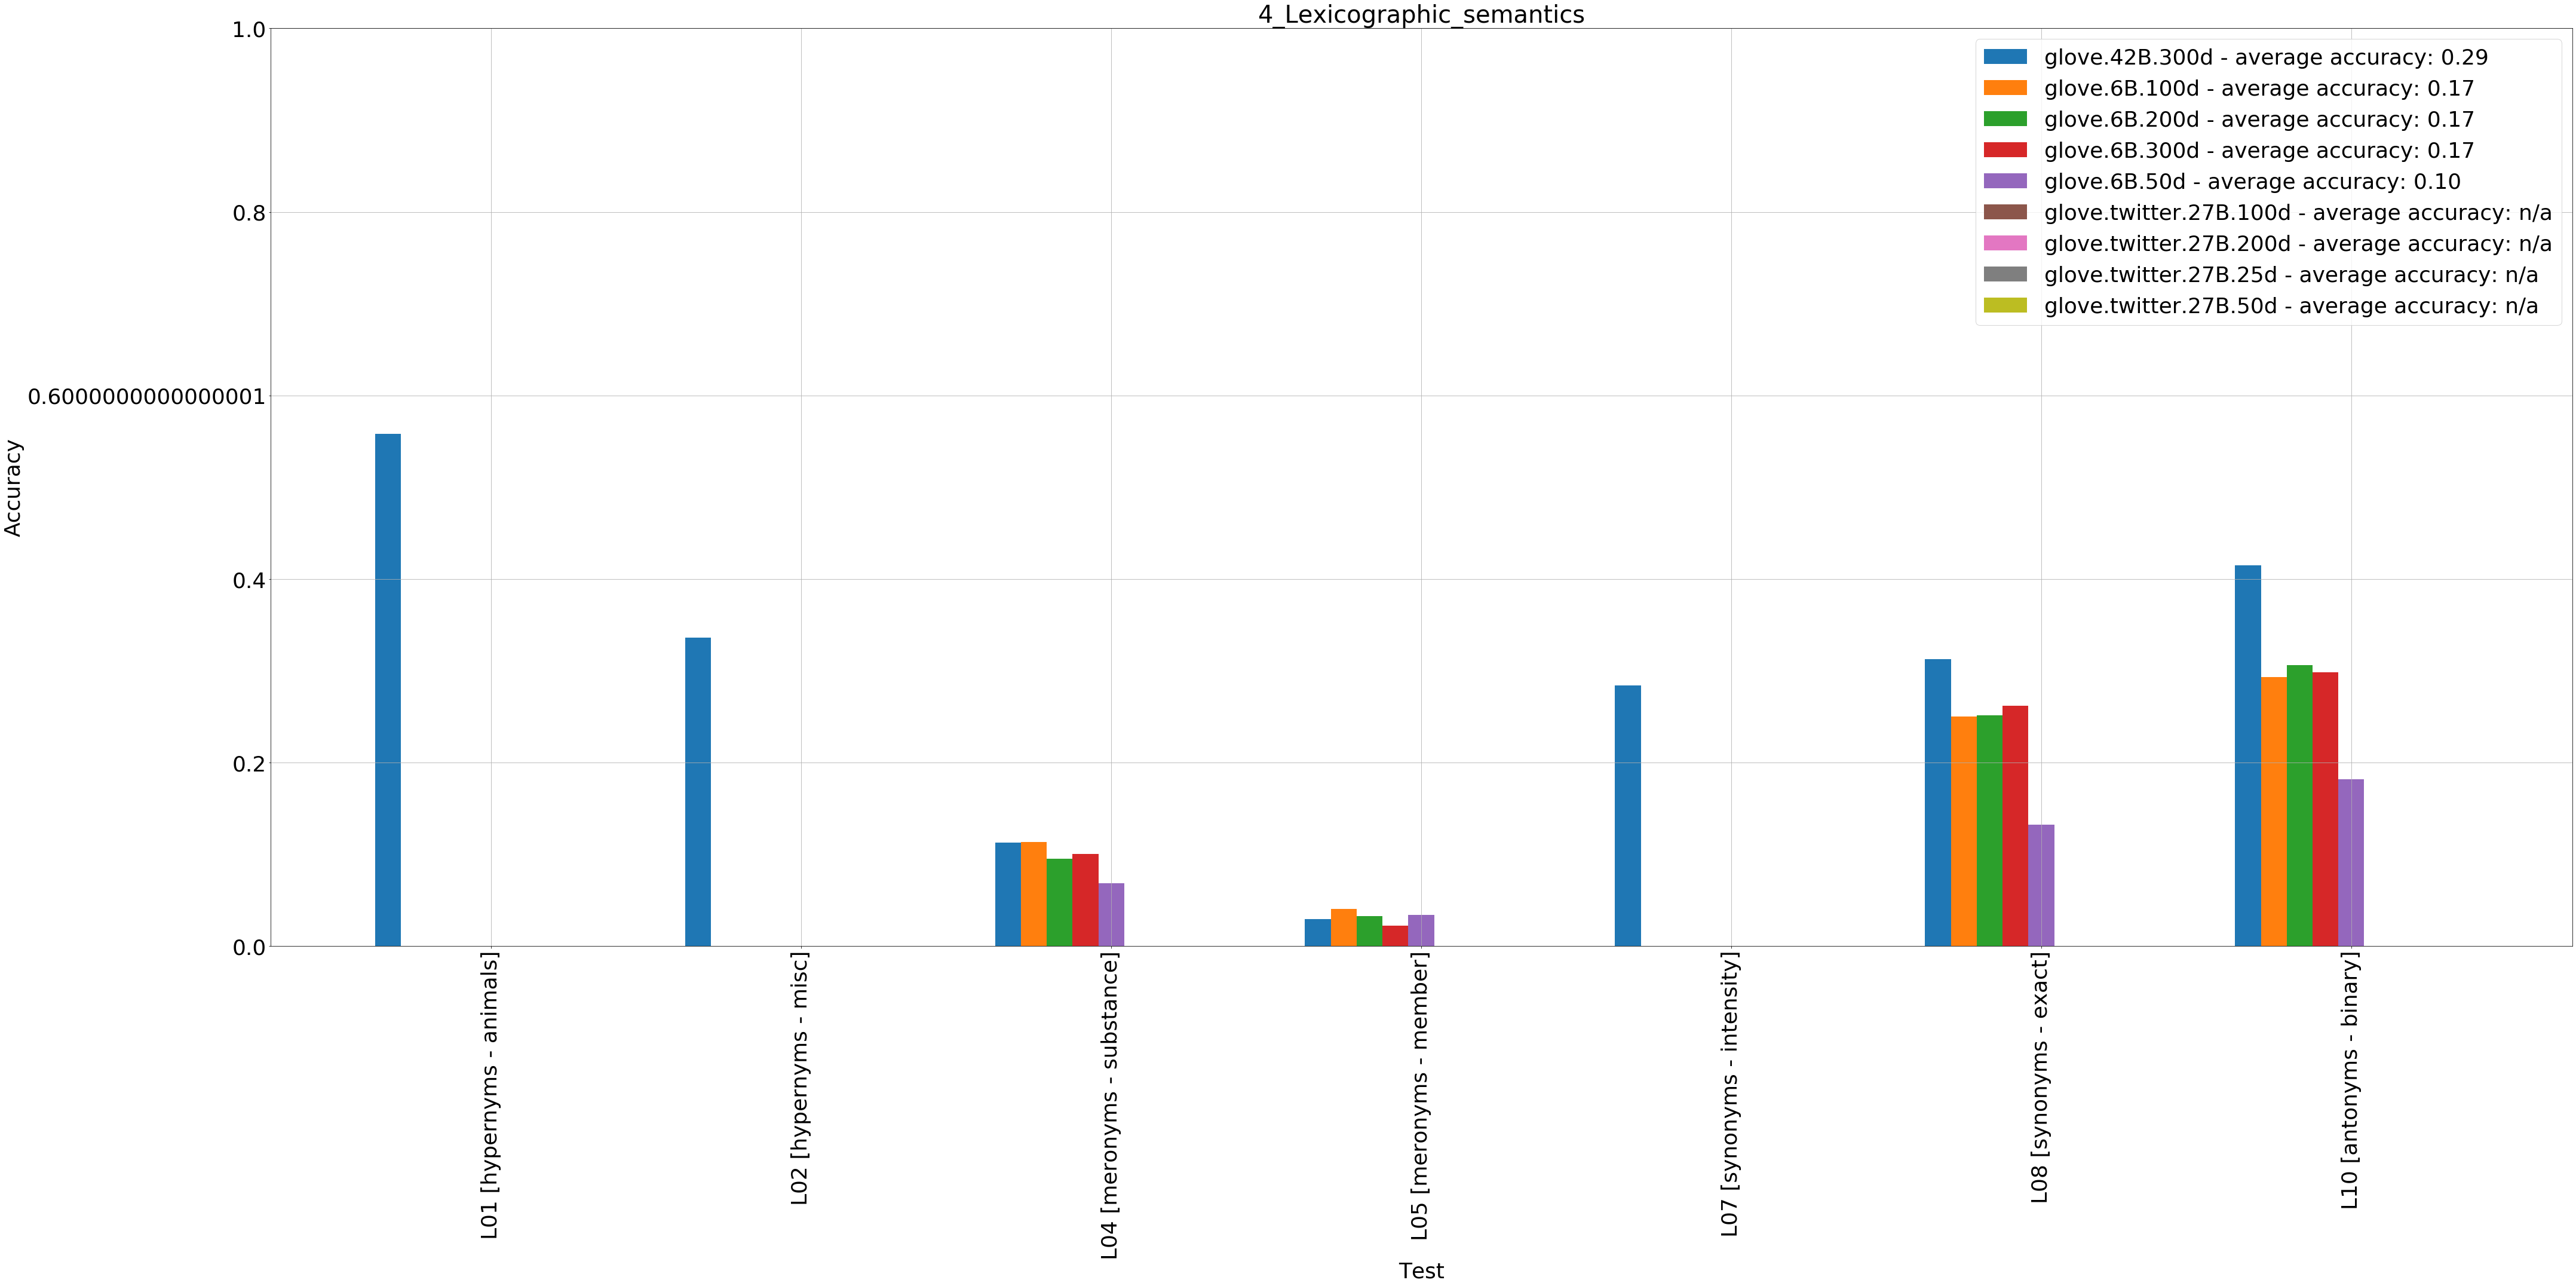

In [125]:
# Make plots

data = load_data('Experimental_Results')
tests = ['1_Inflectional_morphology', '2_Derivational_morphology', '3_Encyclopedic_semantics', '4_Lexicographic_semantics']

for i in range(len(tests)):
    fig, ax = plt.subplots(figsize=(60,30))
    ax = make_bar(data, ax, tests[i])
    ax.set_title(tests[i], fontsize=40)
    fig.tight_layout()
    fig.savefig('{:s}.png'.format(tests[i]))


plt.show()

In [ ]:
data["glove.42B.300d"]